In [52]:
from pyspark.ml.regression import LinearRegression
from pyspark.sql.types import *
import pyspark.sql.functions as Function
from pyspark.ml.feature import VectorAssembler

# Adım 1: Verilerin Yüklenmesi

In [53]:
spark = SparkSession \
.builder \
.appName("Tubitak Odev 4") \
.getOrCreate()

In [54]:
csv = spark.read.csv(r"D:\YZUP-Notlarim\YZUP-Uzmanlık-Egitim\Tubitak-VeriYogunUygulamalar\Tubitak Spark Proje\data\housing.csv", inferSchema=True, header=True)

# Adım 2: Verilerin Çeşitli Spark Fonksiyonları Kullanılarak İncelenmesi

In [65]:
csv.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [66]:
csv.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



<Axes: xlabel='ocean_proximity'>

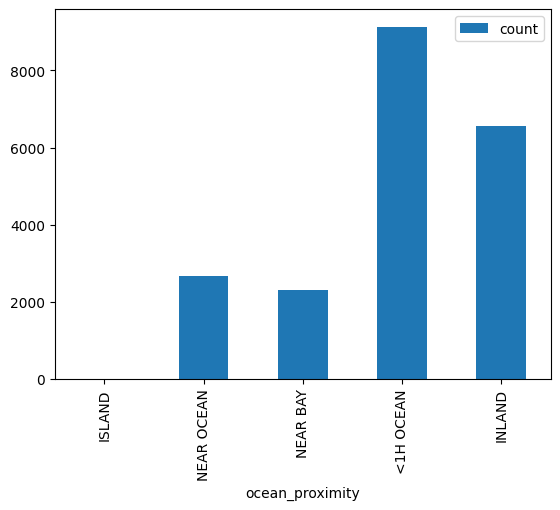

In [64]:
ocean_prox = csv.groupBy("ocean_proximity").count()
ocean_prox.toPandas().plot.bar(x="ocean_proximity")

In [61]:
(csv.describe().select(
                    "summary",
                    Function.round("longitude",2).alias("longitude"),
                    Function.round("latitude",2).alias("latitude"),
                    Function.round("housing_median_age", 2).alias("housing_median_age"),
                    Function.round("total_rooms", 2).alias("total_rooms"),
                    Function.round("total_bedrooms", 2).alias("total_bedrooms"),
                    Function.round("population", 2).alias("population"),
                    Function.round("households", 2).alias("households"),
                    Function.round("median_income", 2).alias("median_income"),
                    Function.round("median_house_value", 2).alias("median_house_value"))
                    .show())

+-------+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|summary|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+-------+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  count|  20640.0| 20640.0|           20640.0|    20640.0|       20433.0|   20640.0|   20640.0|      20640.0|           20640.0|
|   mean|  -119.57|   35.63|             28.64|    2635.76|        537.87|   1425.48|    499.54|         3.87|         206855.82|
| stddev|      2.0|    2.14|             12.59|    2181.62|        421.39|   1132.46|    382.33|          1.9|         115395.62|
|    min|  -124.35|   32.54|               1.0|        2.0|           1.0|       3.0|       1.0|          0.5|           14999.0|
|    max|  -114.31|   41.95|              52.0|    39320.0|        6445.0|   35682.0|    6